Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
!pip install mlxtend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read the data

In [3]:
movie=pd.read_csv('my_movies.csv')
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.shape

(10, 15)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movie.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

<Axes: >

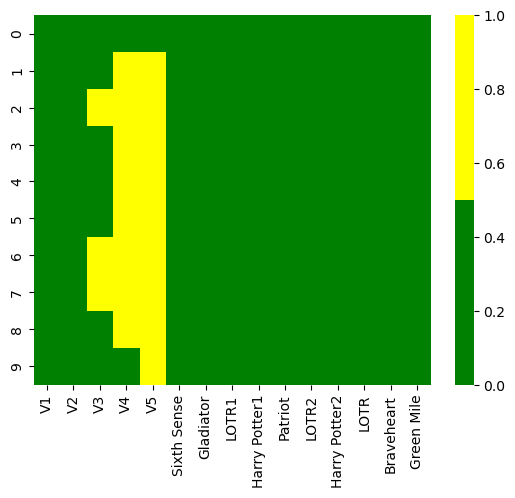

In [7]:
color=['green','yellow']
pal=sns.color_palette(color)
sns.heatmap(movie.isnull(),cmap=pal)

In [8]:
movie.fillna(0,inplace=True)

In [9]:
movie['V4'].fillna(movie['V4'].mode()[0], inplace=True)
movie['V5'].fillna(movie['V5'].mode()[0], inplace=True)

In [10]:
movie.isnull().sum()

V1               0
V2               0
V3               0
V4               0
V5               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [11]:
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [12]:
movie.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


<Axes: >

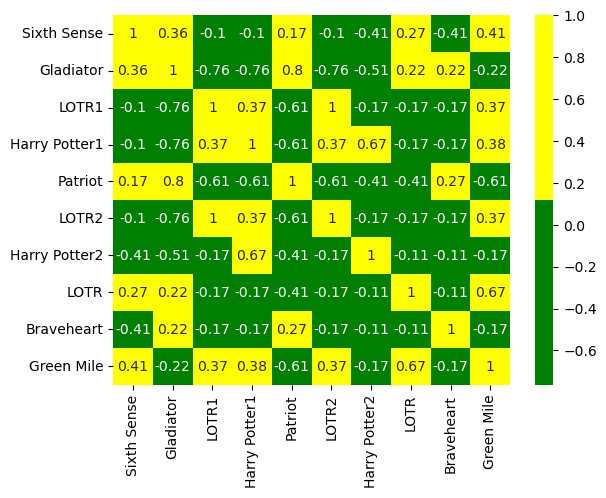

In [13]:
color=['green','yellow']
pal=sns.color_palette(color)
sns.heatmap(movie.corr(),cmap=pal,annot=True)

# pair plot

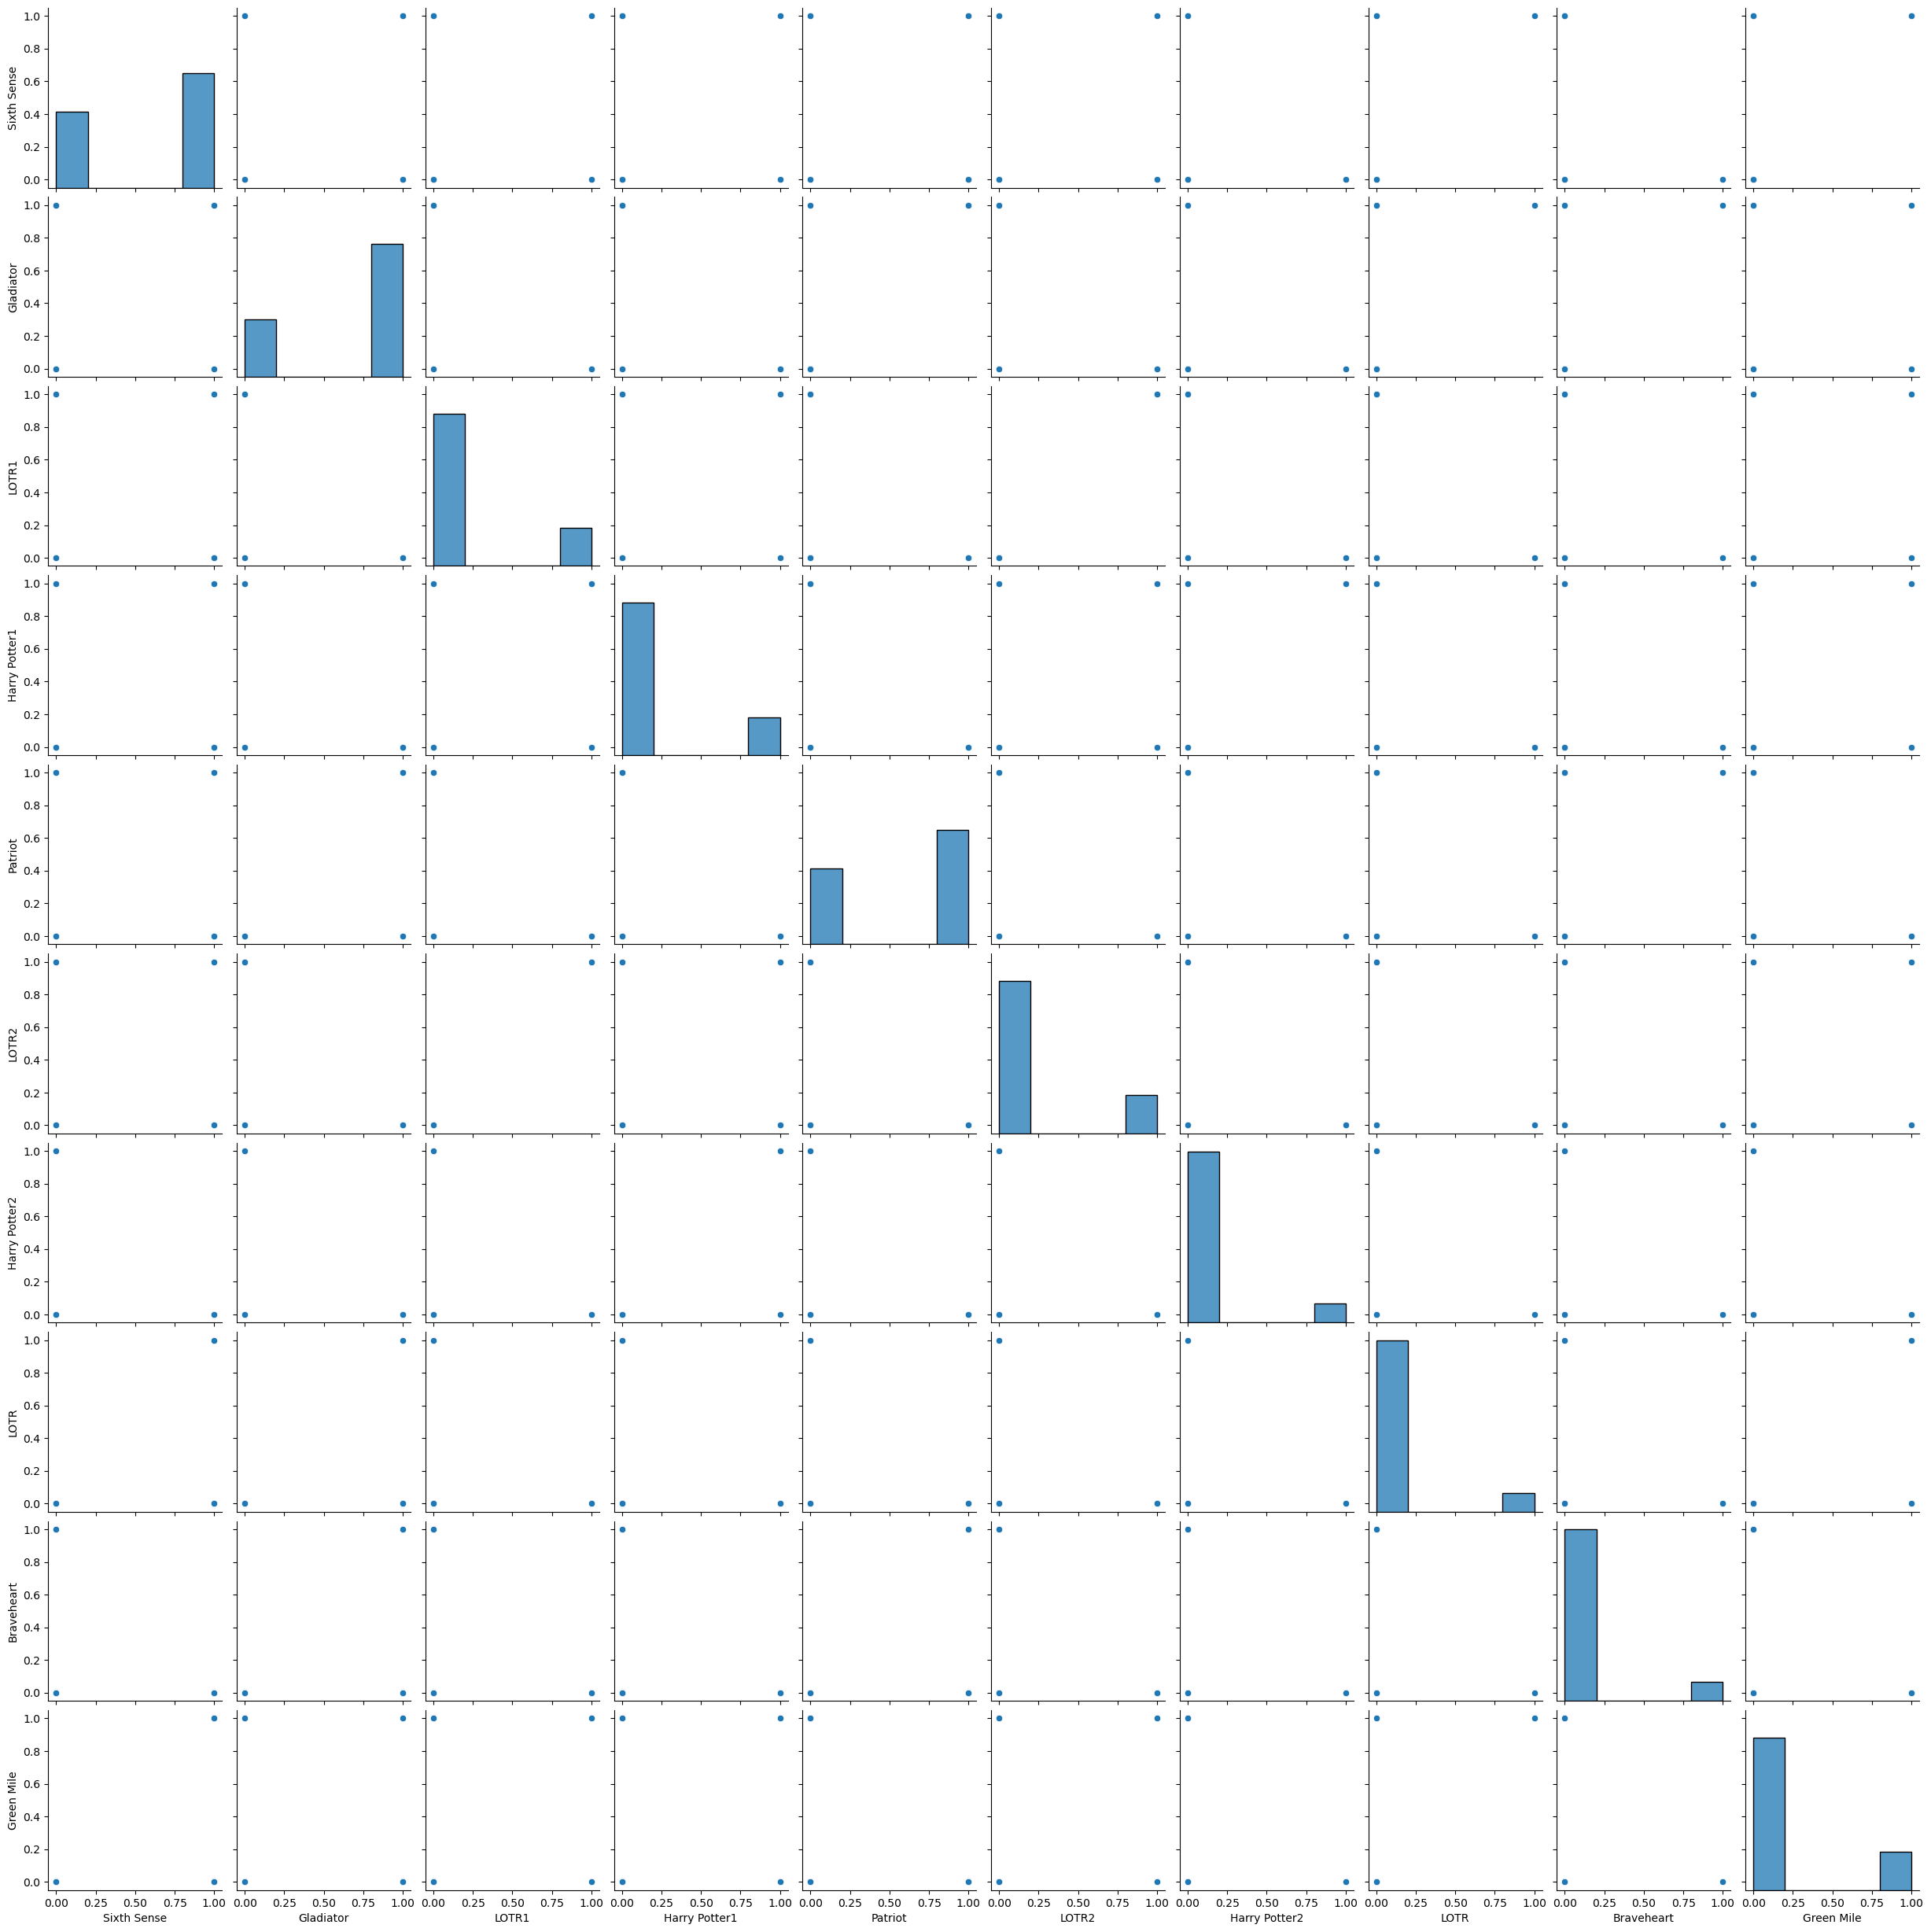

In [14]:
sns.pairplot(data=movie)

# box plot

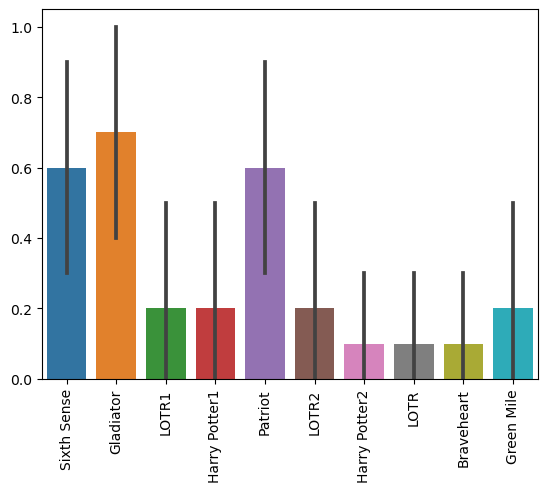

In [15]:
sns.barplot(data=movie)
plt.xticks(rotation=90)
plt.show()

# drop duplicates value

In [16]:
movie.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [17]:
movie[movie.duplicated()]



,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0


In [18]:
movie.drop_duplicates(inplace=True)
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [19]:
items_list=[['Sixth Sense','Gladiator','LOTR1','Gladiator','Harry Potter1','Gladiator','Sixth Sense'],
            ['LOTR1','Patriot','LOTR2','Patriot','Harry Potter2','Patriot','LOTR'],
            ['Harry Potter1','Braveheart','Sixth Sense','Gladiator'],
            ['Green Mile','Green Mile'],
            ['LOTR2']
]

In [20]:
from mlxtend.preprocessing import TransactionEncoder

In [21]:
te=TransactionEncoder()

In [22]:
te_arry=te.fit_transform(items_list)
te_arry

array([[False,  True, False,  True, False, False,  True, False, False,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
        False],
       [ True,  True, False,  True, False, False, False, False, False,
         True],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False]])

In [23]:
te.columns_

['Braveheart',
 'Gladiator',
 'Green Mile',
 'Harry Potter1',
 'Harry Potter2',
 'LOTR',
 'LOTR1',
 'LOTR2',
 'Patriot',
 'Sixth Sense']

In [24]:
movie_df=pd.DataFrame(data=te_arry,columns=te.columns_)

In [25]:
movie_df

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,True,False,True,False,False,True,False,False,True
1,False,False,False,False,True,True,True,True,True,False
2,True,True,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False


# create the frequent  itemsets

In [26]:
from mlxtend.frequent_patterns import apriori

In [27]:
freq_items=apriori(movie_df,min_support=0.2,use_colnames=True)

In [28]:
freq_items

,support,itemsets
0,0.2,(Braveheart)
1,0.4,(Gladiator)
2,0.2,(Green Mile)
3,0.4,(Harry Potter1)
4,0.2,(Harry Potter2)
5,0.2,(LOTR)
6,0.4,(LOTR1)
7,0.4,(LOTR2)
8,0.2,(Patriot)
9,0.4,(Sixth Sense)


# Change the minimum  length=0.3 in apriori algorithm

In [29]:
freq_item3=apriori(movie_df,min_support=0.3,use_colnames=True)

In [30]:
freq_item3

,support,itemsets
0,0.4,(Gladiator)
1,0.4,(Harry Potter1)
2,0.4,(LOTR1)
3,0.4,(LOTR2)
4,0.4,(Sixth Sense)
5,0.4,"(Gladiator, Harry Potter1)"
6,0.4,"(Gladiator, Sixth Sense)"
7,0.4,"(Sixth Sense, Harry Potter1)"
8,0.4,"(Gladiator, Sixth Sense, Harry Potter1)"


# Change the minimum length=0.4 in apriori algorithm

In [32]:
freq_item4=apriori(movie_df,min_support=0.4,use_colnames=True)

In [33]:
freq_item4

,support,itemsets
0,0.4,(Gladiator)
1,0.4,(Harry Potter1)
2,0.4,(LOTR1)
3,0.4,(LOTR2)
4,0.4,(Sixth Sense)
5,0.4,"(Gladiator, Harry Potter1)"
6,0.4,"(Gladiator, Sixth Sense)"
7,0.4,"(Sixth Sense, Harry Potter1)"
8,0.4,"(Gladiator, Sixth Sense, Harry Potter1)"


# Change the minimum length=0.5 in apriori algorithm

In [34]:
freq_item5=apriori(movie_df,min_support=0.5,use_colnames=True)
freq_item5

,support,itemsets


# from frequent itemsets extract the association rules

In [35]:
from mlxtend.frequent_patterns import association_rules

In [36]:
assoc_rules=association_rules(freq_items,min_threshold=1.0)

In [37]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
1,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Sixth Sense),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# lift value which items have value greater than 1

In [38]:
lift=assoc_rules[assoc_rules['lift']>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
1,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Sixth Sense),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# lift value which items have value  greater than 4

In [39]:
assoc_rules[assoc_rules['lift']>4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(LOTR),(Harry Potter2),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
10,(Harry Potter2),(LOTR),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
13,(Patriot),(Harry Potter2),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
14,(Harry Potter2),(Patriot),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
17,(LOTR),(Patriot),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0


# lift value which items have value greater than  5

In [40]:
assoc_rules[assoc_rules['lift']>=5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(LOTR),(Harry Potter2),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
10,(Harry Potter2),(LOTR),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
13,(Patriot),(Harry Potter2),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
14,(Harry Potter2),(Patriot),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
17,(LOTR),(Patriot),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0


# change the min_threshold value=0.5

In [41]:
assoc_rules1=association_rules(freq_items,min_threshold=0.5)

In [42]:
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Braveheart),0.4,0.2,0.2,0.5,2.5,0.12,1.6,1.00
1,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Harry Potter1),(Braveheart),0.4,0.2,0.2,0.5,2.5,0.12,1.6,1.00
4,(Sixth Sense),(Braveheart),0.4,0.2,0.2,0.5,2.5,0.12,1.6,1.00
...,...,...,...,...,...,...,...,...,...,...
263,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
264,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
265,(LOTR1),"(LOTR, Harry Potter2, Patriot, LOTR2)",0.4,0.2,0.2,0.5,2.5,0.12,1.6,1.00
266,(Patriot),"(LOTR, Harry Potter2, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# change the min_threshold value=0.6

In [43]:
assoc_rules1=association_rules(freq_items,min_threshold=0.6)
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
1,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Sixth Sense),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# change the min_threshold value=0.8

In [44]:
assoc_rules1=association_rules(freq_items,min_threshold=0.8)
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
1,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Sixth Sense),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# support

In [45]:
support=assoc_rules[assoc_rules['support']>0.3]
support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
5,(Gladiator),(Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
6,(Sixth Sense),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
7,(Sixth Sense),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
8,(Harry Potter1),(Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
32,"(Gladiator, Sixth Sense)",(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
33,"(Gladiator, Harry Potter1)",(Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
34,"(Sixth Sense, Harry Potter1)",(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
35,(Gladiator),"(Sixth Sense, Harry Potter1)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0


# confidence

In [46]:
confidence=assoc_rules[assoc_rules['confidence']>=1]
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Braveheart),(Gladiator),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
1,(Braveheart),(Harry Potter1),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
2,(Braveheart),(Sixth Sense),0.2,0.4,0.2,1.0,2.5,0.12,inf,0.75
3,(Gladiator),(Harry Potter1),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
4,(Harry Potter1),(Gladiator),0.4,0.4,0.4,1.0,2.5,0.24,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
188,"(LOTR1, LOTR2)","(LOTR, Harry Potter2, Patriot)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
189,"(Patriot, LOTR2)","(LOTR, Harry Potter2, LOTR1)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
190,(Harry Potter2),"(LOTR, Patriot, LOTR1, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00
191,(LOTR),"(LOTR1, Harry Potter2, Patriot, LOTR2)",0.2,0.2,0.2,1.0,5.0,0.16,inf,1.00


# scatter plot using support and confidence data

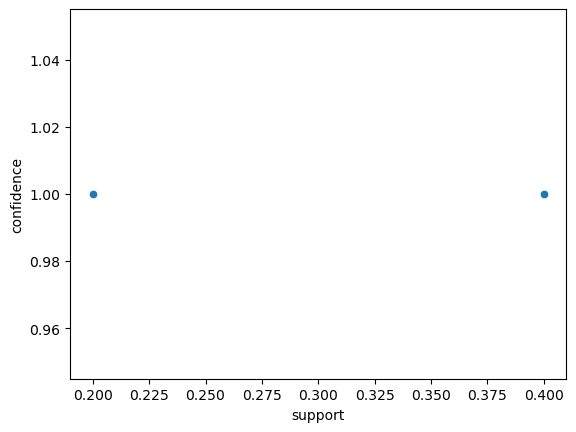

In [47]:
sns.scatterplot(x='support',
               y='confidence',
               data=assoc_rules
               )
plt.show()

# scatter plot using support and lift data

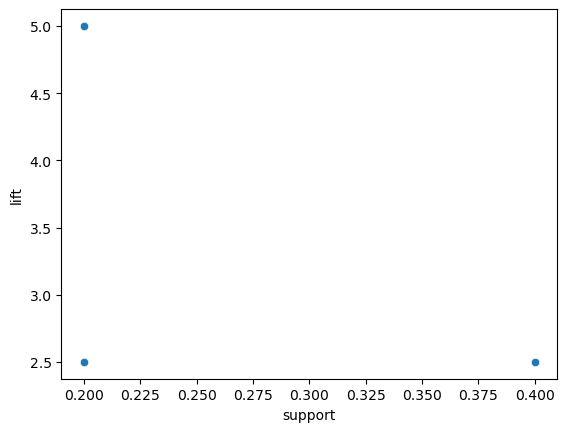

In [92]:
sns.scatterplot(x='support',
               y='lift',
               data=assoc_rules
               )
plt.show()

# scatter plot using confidence and lift data

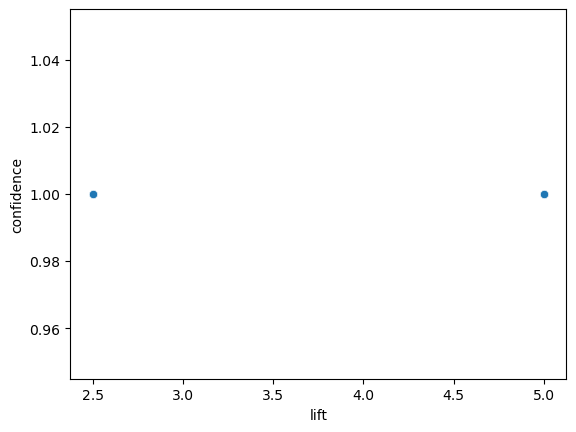

In [94]:
sns.scatterplot(x='lift',
               y='confidence',
               data=assoc_rules
               )
plt.show()

In [48]:
items_list=[['Sixth Sense','Gladiator','LOTR1','Gladiator','Harry Potter1','Gladiator','Sixth Sense'],
            ['LOTR1','Patriot','LOTR2','Patriot','Harry Potter2','Patriot','LOTR'],
            ['Harry Potter1','Braveheart','Sixth Sense','Gladiator'],
            ['Green Mile','Green Mile'],
            ['LOTR2']
]

In [49]:
column_name = 'Sixth Sense','Gladiator','LOTR1','Gladiator','Harry Potter1','Gladiator','Sixth Sense'
column_data = [1 if column_name in row else 0 for row in items_list]


# histogram plt

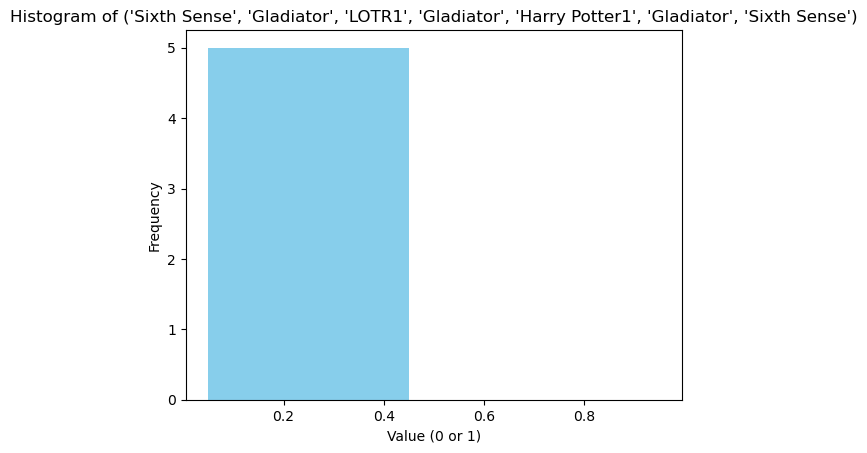

In [50]:
plt.hist(column_data, bins=[0, 0.5, 1], rwidth=0.8, align='mid', color='skyblue')
plt.title(f'Histogram of {column_name}')
plt.xlabel('Value (0 or 1)')
plt.ylabel('Frequency')
plt.show()

In [51]:
items_list={'V1':['Sixth Sense','Gladiator','LOTR1','Gladiator','Harry Potter1','Gladiator','Sixth Sense'],
            'V2':['LOTR1','Patriot','LOTR2','Patriot','Harry Potter2','Patriot','LOTR'],
            'V3':['Harry Potter1','Braveheart',0,'Sixth Sense','Gladiator'],
            'V4':['Green Mile','Green Mile'],
            'V5':['LOTR2']
           }

In [52]:
#movie=pd.DataFrame(items_list)

In [53]:
movie



,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [54]:
movie_columns = ['V1', 'V2','V3','V4','V5']

In [55]:
len(movie_columns)

5

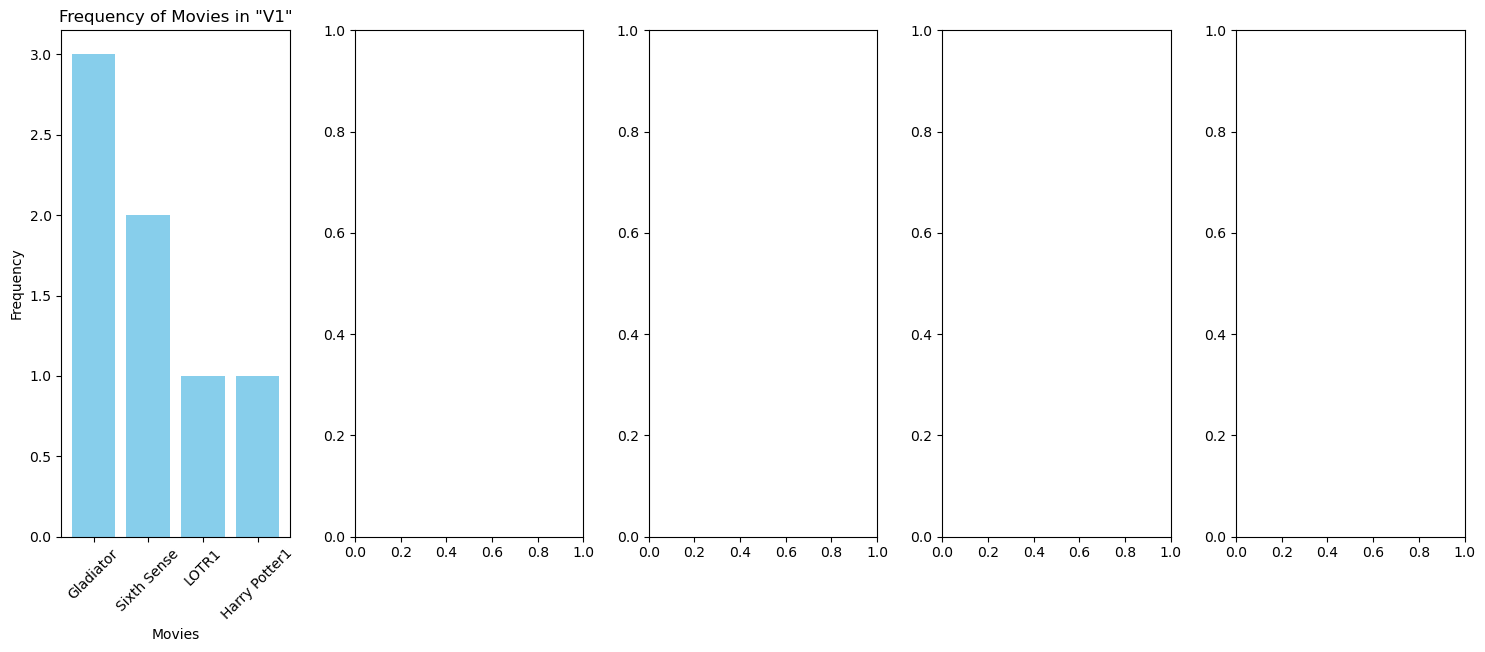

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
for i, movie_column in enumerate(movie_columns):
    movie_counts = movie[movie_column].value_counts()
    x_values = range(len(movie_counts))
    axes[i].bar(x_values, movie_counts.values, color='skyblue')
    axes[i].set_title(f'Frequency of Movies in "{movie_column}"')
    axes[i].set_xlabel('Movies')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(movie_counts.index)
    plt.tight_layout()
    axes[i].tick_params(axis='x', rotation=45)
    #plt.tight_layout()
    plt.show()

# heat map

In [57]:
movie.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.166667,0.091287,0.091287,-0.166667,0.091287,-0.353553,0.471405,-0.353553,0.730297
Gladiator,0.166667,1.000000,-0.730297,-0.730297,0.750000,-0.730297,-0.471405,0.353553,0.353553,-0.091287
LOTR1,0.091287,-0.730297,1.000000,0.300000,-0.547723,1.000000,-0.258199,-0.258199,-0.258199,0.300000
Harry Potter1,0.091287,-0.730297,0.300000,1.000000,-0.547723,0.300000,0.645497,-0.258199,-0.258199,0.300000
Patriot,-0.166667,0.750000,-0.547723,-0.547723,1.000000,-0.547723,-0.353553,-0.353553,0.471405,-0.547723
LOTR2,0.091287,-0.730297,1.000000,0.300000,-0.547723,1.000000,-0.258199,-0.258199,-0.258199,0.300000
Harry Potter2,-0.353553,-0.471405,-0.258199,0.645497,-0.353553,-0.258199,1.000000,-0.166667,-0.166667,-0.258199
LOTR,0.471405,0.353553,-0.258199,-0.258199,-0.353553,-0.258199,-0.166667,1.000000,-0.166667,0.645497
Braveheart,-0.353553,0.353553,-0.258199,-0.258199,0.471405,-0.258199,-0.166667,-0.166667,1.000000,-0.258199
Green Mile,0.730297,-0.091287,0.300000,0.300000,-0.547723,0.300000,-0.258199,0.645497,-0.258199,1.000000


<Axes: >

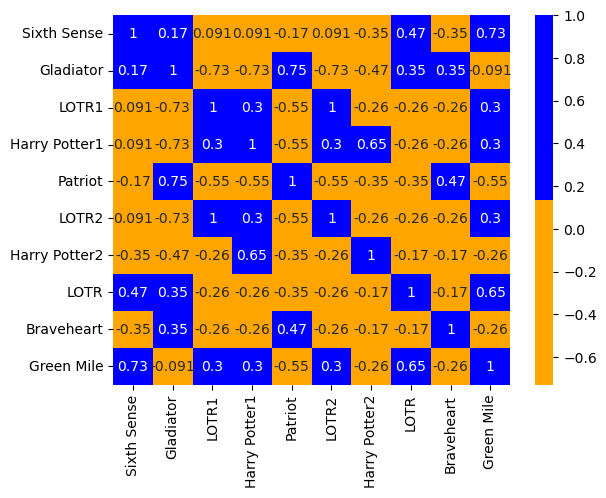

In [58]:
color=['orange','blue']
pal=sns.color_palette(color)
sns.heatmap(movie.corr(),cmap=pal,annot=True)

# boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sixth Sense'),
  Text(1, 0, 'Gladiator'),
  Text(2, 0, 'LOTR1'),
  Text(3, 0, 'Harry Potter1'),
  Text(4, 0, 'Patriot'),
  Text(5, 0, 'LOTR2'),
  Text(6, 0, 'Harry Potter2'),
  Text(7, 0, 'LOTR'),
  Text(8, 0, 'Braveheart'),
  Text(9, 0, 'Green Mile')])

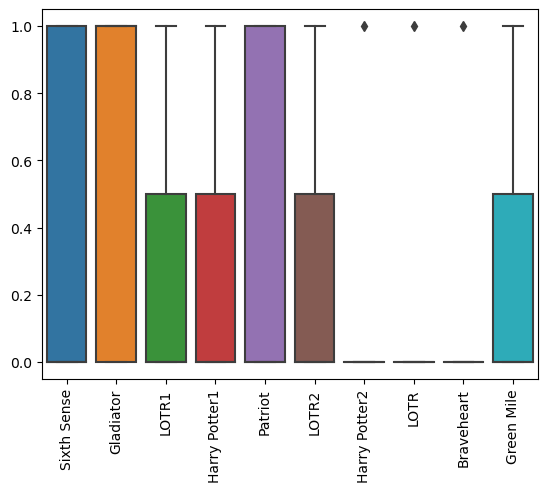

In [59]:
sns.boxplot(data=movie)
plt.xticks(rotation=90)

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


# read the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
books=pd.read_csv('books.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [63]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [64]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

<Axes: >

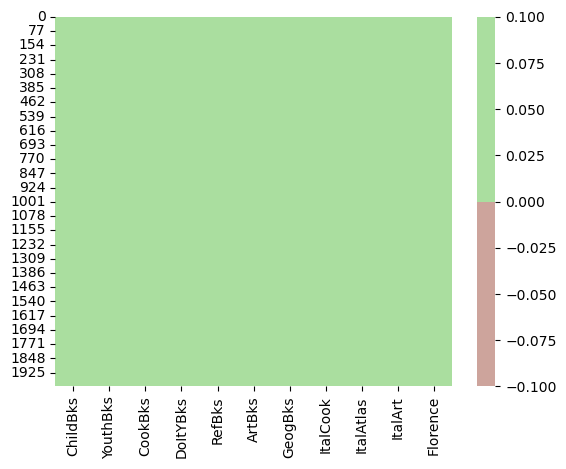

In [66]:
colors=['#CDA49C','#AADE9F']
pal=sns.color_palette(colors)
sns.heatmap(books.isnull(),cmap=pal)

In [67]:
books.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


<Axes: >

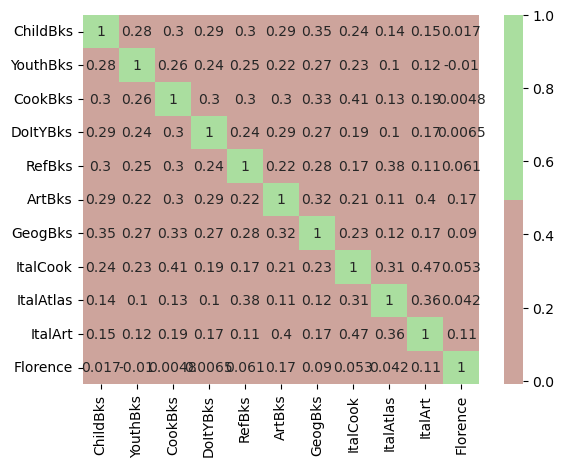

In [68]:
colors=['#CDA49C','#AADE9F']
pal=sns.color_palette(colors)
sns.heatmap(books.corr(),cmap=pal,annot=True)

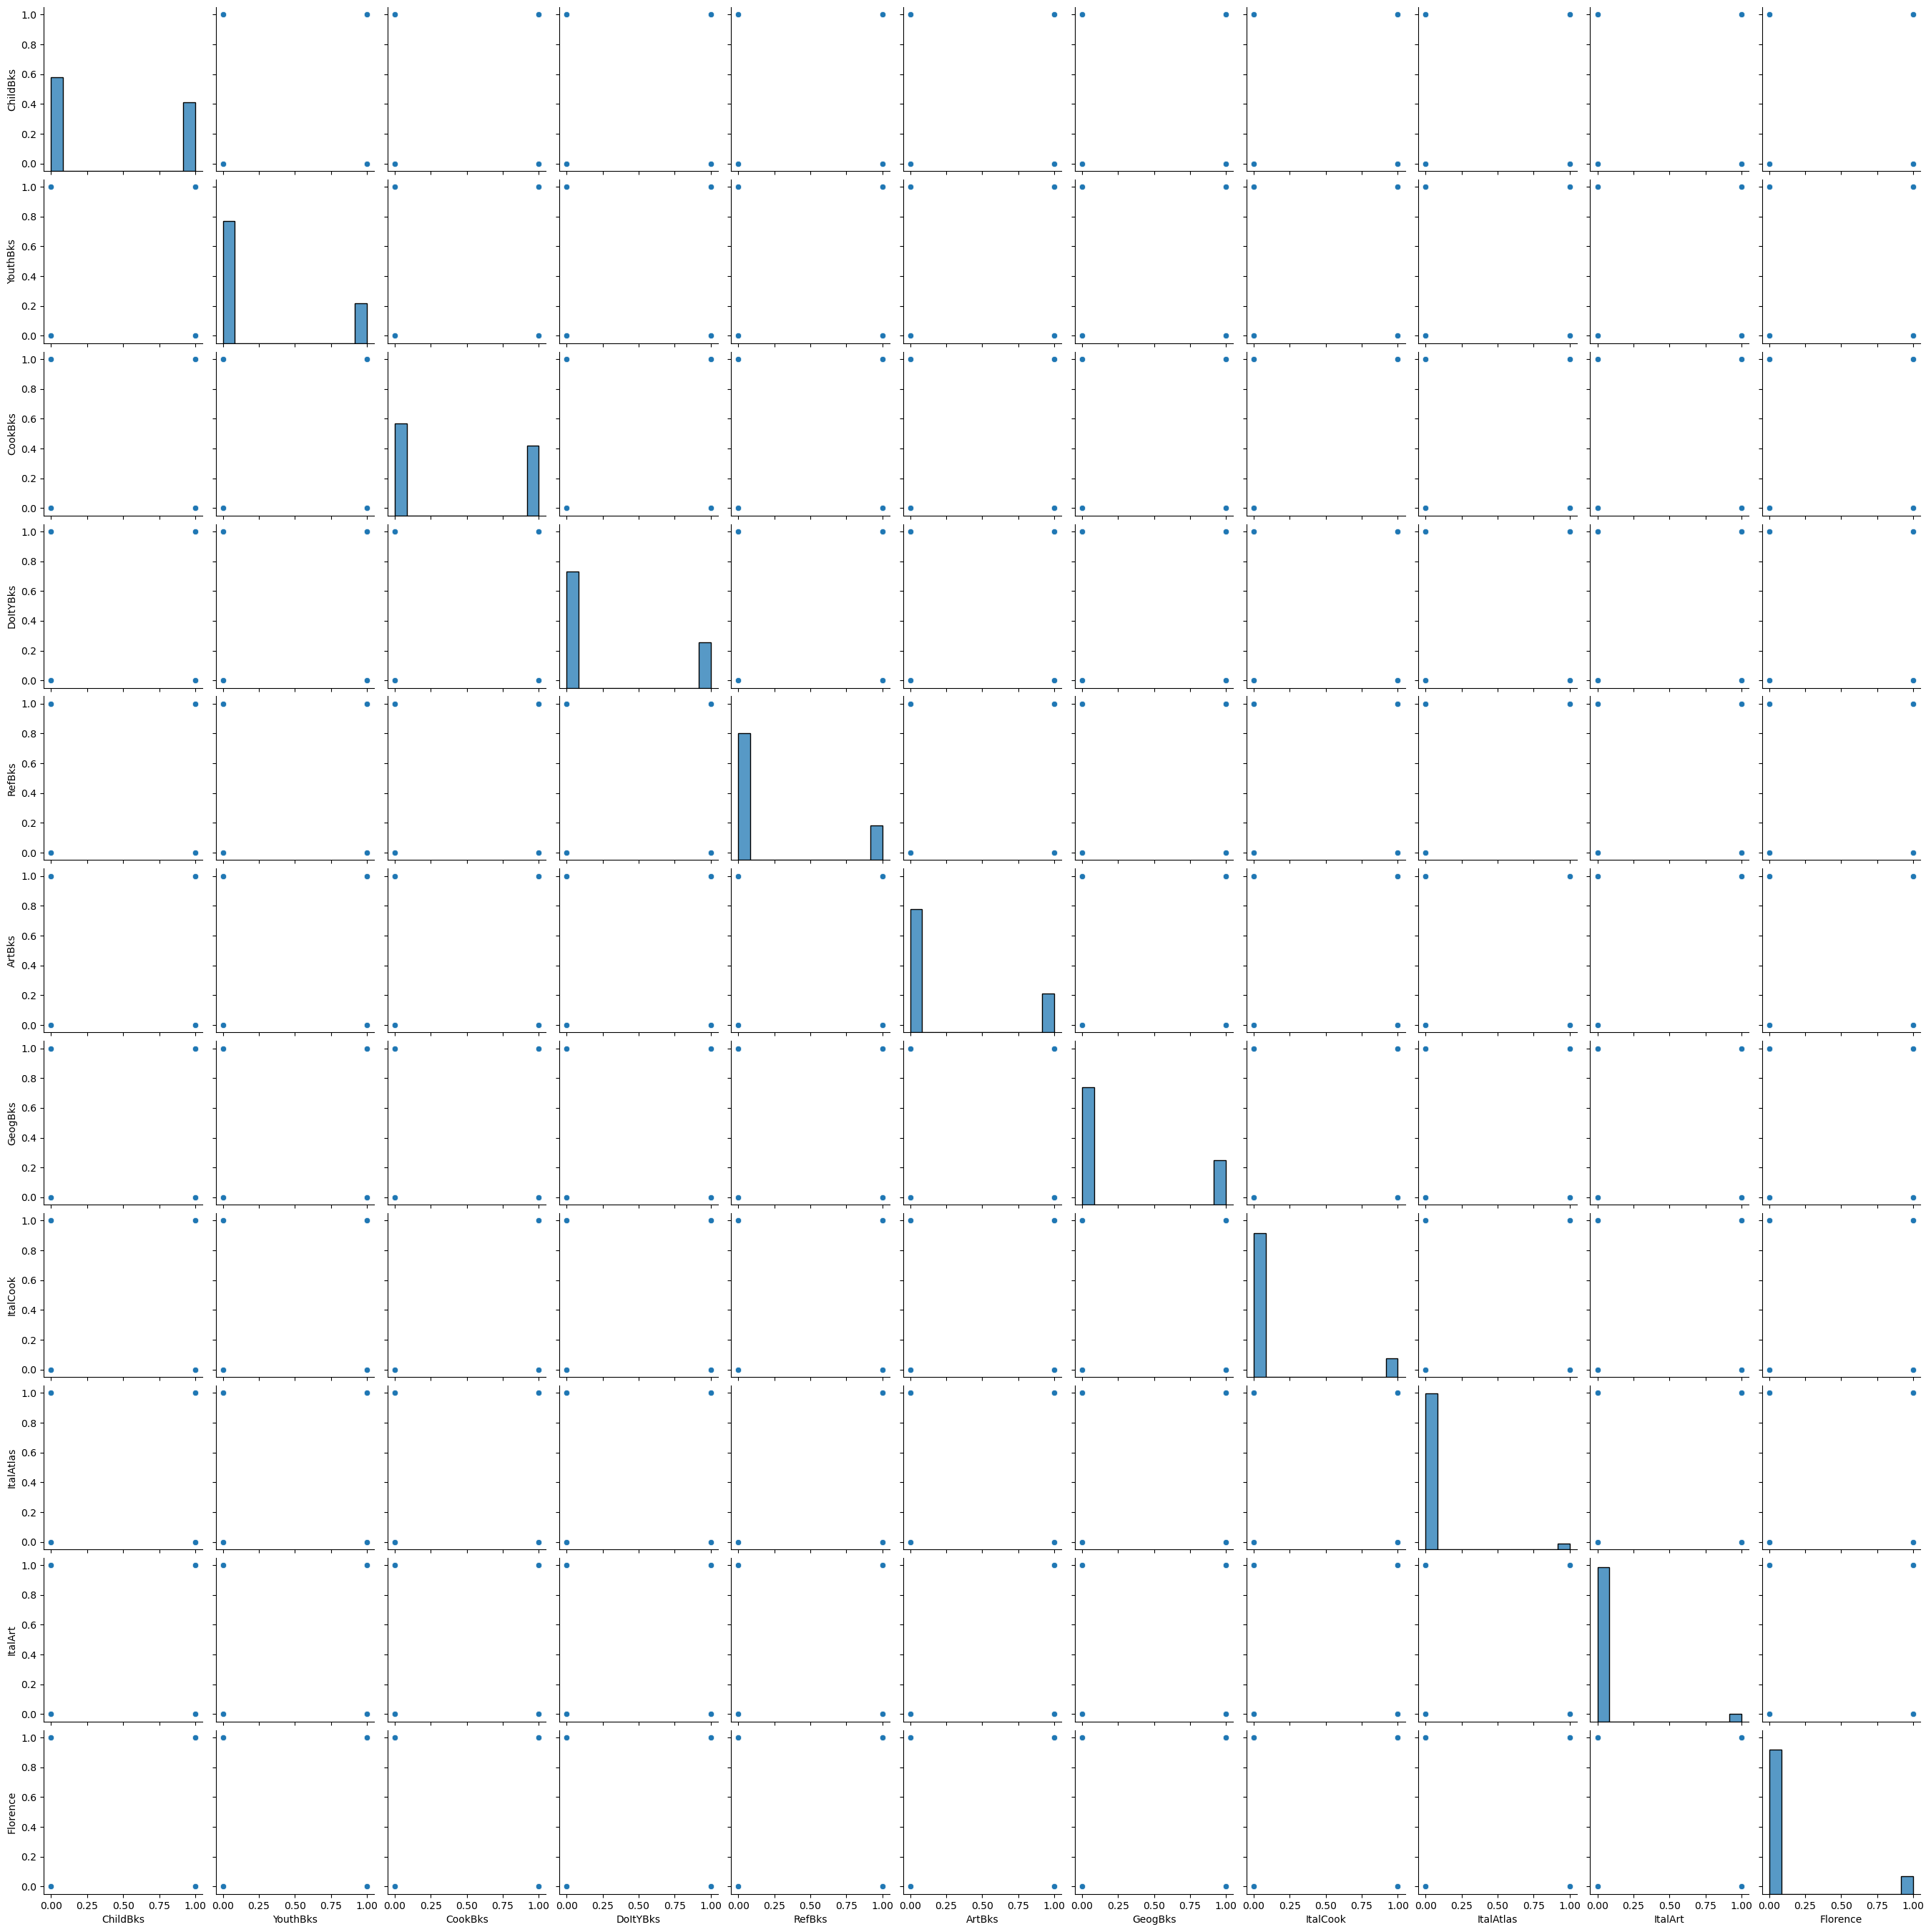

In [69]:
sns.pairplot(data=books)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'ChildBks'),
  Text(1, 0, 'YouthBks'),
  Text(2, 0, 'CookBks'),
  Text(3, 0, 'DoItYBks'),
  Text(4, 0, 'RefBks'),
  Text(5, 0, 'ArtBks'),
  Text(6, 0, 'GeogBks'),
  Text(7, 0, 'ItalCook'),
  Text(8, 0, 'ItalAtlas'),
  Text(9, 0, 'ItalArt'),
  Text(10, 0, 'Florence')])

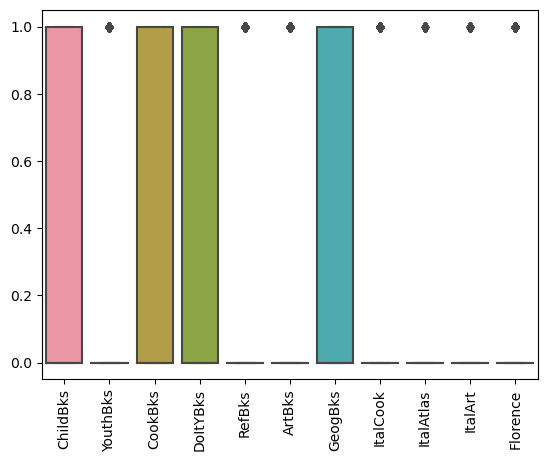

In [70]:
sns.boxplot(data=books)
plt.xticks(rotation=90)

In [71]:
books.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [72]:
books[books.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [7]:
books.drop_duplicates(inplace=True)

In [8]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


# create the frequent itemsets

In [76]:
from mlxtend.frequent_patterns import apriori

In [121]:
frequent_bookitems=apriori(books,min_support=0.2,use_colnames=True)

In [78]:
frequent_bookitems

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(YouthBks, ChildBks)"


# Change the minimum  length=0.3 in apriori algorithm

In [122]:
freq_bookitems=apriori(books,min_support=0.3,use_colnames=True)
freq_bookitems

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(YouthBks, ChildBks)"


# Change the minimum  length=0.4 in apriori algorithm

In [123]:
freq_bookitems=apriori(books,min_support=0.4,use_colnames=True)
freq_bookitems

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.437500,"(CookBks, ChildBks)"


# Change the minimum  length=0.5 in apriori algorithm

In [124]:
freq_bookitems=apriori(books,min_support=0.5,use_colnames=True)
freq_bookitems

,support,itemsets
0,0.612500,(ChildBks)
1,0.681250,(CookBks)
2,0.506250,(RefBks)
3,0.556250,(ArtBks)
4,0.521875,(GeogBks)


# Change the minimum  length=0.6 in apriori algorithm

In [125]:
freq_bookitems=apriori(books,min_support=0.6,use_colnames=True)
freq_bookitems

,support,itemsets
0,0.61250,(ChildBks)
1,0.68125,(CookBks)


# Change the minimum  length=0.7 in apriori algorithm

In [126]:
freq_bookitems=apriori(books,min_support=0.7,use_colnames=True)
freq_bookitems

,support,itemsets


# from frequent itemsets extract the association rules

In [90]:
from mlxtend.frequent_patterns import association_rules

In [95]:
assoc_rule=association_rules(frequent_bookitems,min_threshold=0.5)

In [96]:
assoc_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
...,...,...,...,...,...,...,...,...,...,...
60,"(CookBks, ArtBks)",(DoItYBks),0.384375,0.490625,0.206250,0.536585,1.093677,0.017666,1.099178,0.139132
61,"(DoItYBks, ArtBks)",(CookBks),0.290625,0.681250,0.206250,0.709677,1.041728,0.008262,1.097917,0.056468
62,"(CookBks, ArtBks)",(GeogBks),0.384375,0.521875,0.212500,0.552846,1.059345,0.011904,1.069261,0.090997
63,"(CookBks, GeogBks)",(ArtBks),0.362500,0.556250,0.212500,0.586207,1.053855,0.010859,1.072396,0.080161


# change the min_threshold value=0.6

In [97]:
assoc_rule=association_rules(frequent_bookitems,min_threshold=0.6)
assoc_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.61250,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(CookBks),(ChildBks),0.681250,0.61250,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
2,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(DoItYBks),(ChildBks),0.490625,0.61250,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
4,(RefBks),(ChildBks),0.506250,0.61250,0.340625,0.672840,1.098513,0.030547,1.184434,0.181628
5,(ArtBks),(ChildBks),0.556250,0.61250,0.365625,0.657303,1.073148,0.024922,1.130738,0.153605
6,(GeogBks),(ChildBks),0.521875,0.61250,0.343750,0.658683,1.075400,0.024102,1.135307,0.146643
7,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
8,(Florence),(ChildBks),0.318750,0.61250,0.200000,0.627451,1.024410,0.004766,1.040132,0.034977
9,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496


# change the min_threshold value=0.7

In [99]:
assoc_rule=association_rules(frequent_bookitems,min_threshold=0.7)
assoc_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
1,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
3,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf,0.478873
5,"(YouthBks, ChildBks)",(CookBks),0.300000,0.68125,0.221875,0.739583,1.085627,0.017500,1.224000,0.112676
6,"(DoItYBks, ChildBks)",(CookBks),0.315625,0.68125,0.228125,0.722772,1.060950,0.013105,1.149777,0.083943
7,"(ChildBks, RefBks)",(CookBks),0.340625,0.68125,0.246875,0.724771,1.063884,0.014824,1.158125,0.091067
8,"(ArtBks, ChildBks)",(CookBks),0.365625,0.68125,0.259375,0.709402,1.041324,0.010293,1.096875,0.062556
9,"(ChildBks, GeogBks)",(CookBks),0.343750,0.68125,0.240625,0.700000,1.027523,0.006445,1.062500,0.040816


# lift value which items have value greater than equal to 1

In [112]:
lift=assoc_rule[assoc_rule['lift']>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
1,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
3,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf,0.478873
5,"(YouthBks, ChildBks)",(CookBks),0.300000,0.68125,0.221875,0.739583,1.085627,0.017500,1.224000,0.112676
6,"(DoItYBks, ChildBks)",(CookBks),0.315625,0.68125,0.228125,0.722772,1.060950,0.013105,1.149777,0.083943
7,"(ChildBks, RefBks)",(CookBks),0.340625,0.68125,0.246875,0.724771,1.063884,0.014824,1.158125,0.091067
8,"(ArtBks, ChildBks)",(CookBks),0.365625,0.68125,0.259375,0.709402,1.041324,0.010293,1.096875,0.062556
9,"(ChildBks, GeogBks)",(CookBks),0.343750,0.68125,0.240625,0.700000,1.027523,0.006445,1.062500,0.040816


# support 

In [111]:
support=assoc_rule[assoc_rule['support']>0.3]
support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
3,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf,0.478873


# confidence

In [110]:
confidence=assoc_rule[assoc_rule['confidence']>0.7]
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
1,(ItalCook),(ChildBks),0.334375,0.61250,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
2,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
3,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
4,(ItalCook),(CookBks),0.334375,0.68125,0.334375,1.000000,1.467890,0.106582,inf,0.478873
5,"(YouthBks, ChildBks)",(CookBks),0.300000,0.68125,0.221875,0.739583,1.085627,0.017500,1.224000,0.112676
6,"(DoItYBks, ChildBks)",(CookBks),0.315625,0.68125,0.228125,0.722772,1.060950,0.013105,1.149777,0.083943
7,"(ChildBks, RefBks)",(CookBks),0.340625,0.68125,0.246875,0.724771,1.063884,0.014824,1.158125,0.091067
8,"(ArtBks, ChildBks)",(CookBks),0.365625,0.68125,0.259375,0.709402,1.041324,0.010293,1.096875,0.062556
9,"(ChildBks, GeogBks)",(CookBks),0.343750,0.68125,0.240625,0.700000,1.027523,0.006445,1.062500,0.040816


# scatter plot using support and confidence data

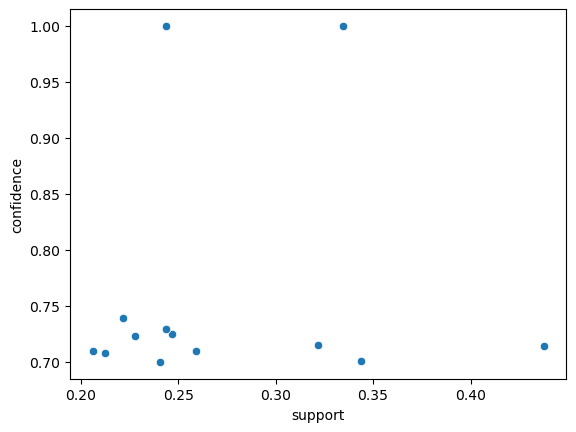

In [114]:
sns.scatterplot(x='support',
               y='confidence',
               data=assoc_rule
               )
plt.show()

# scatter plot using lift and confidence data

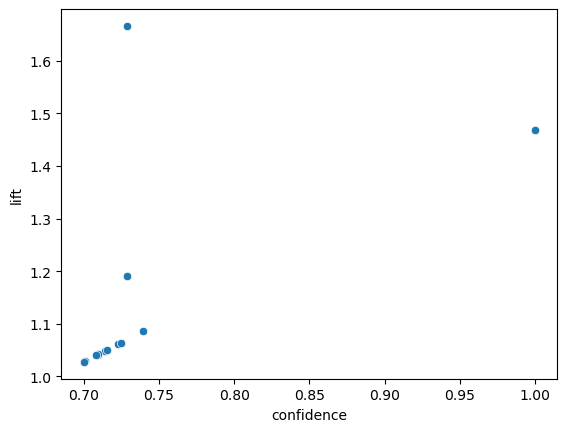

In [117]:
sns.scatterplot(x='confidence',
               y='lift',
               data=assoc_rule
               )
plt.show()

# scatter plot using lift and support data

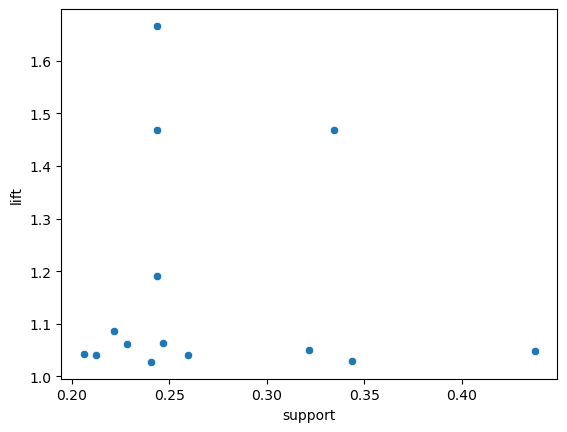

In [119]:
sns.scatterplot(x='support',
               y='lift',
               data=assoc_rule
               )
plt.show()

In [9]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


# histogram plot

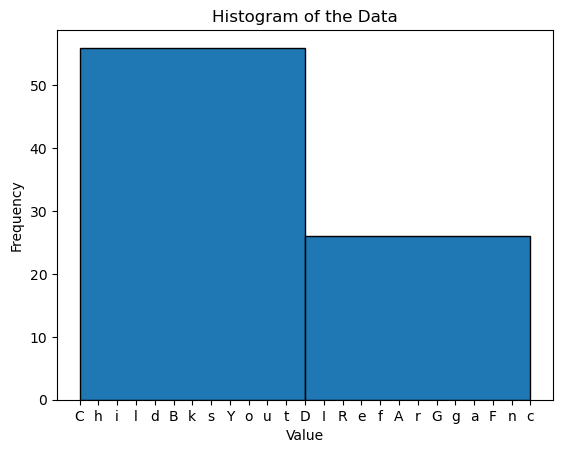

In [11]:
flat_data = [item for sublist in books for item in sublist]
plt.hist(flat_data, bins=2, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Data')
plt.show()

# bar plot

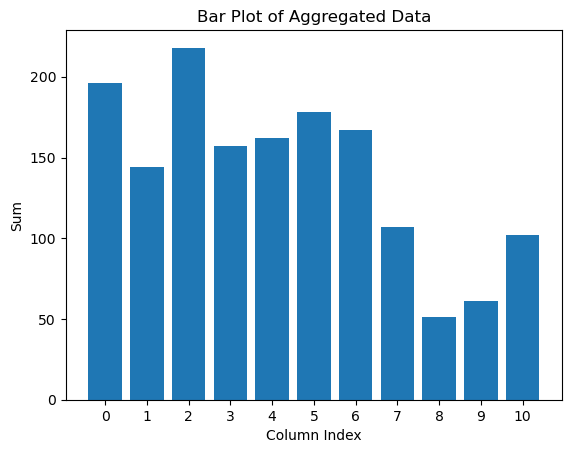

In [12]:
data_array = np.array(books)

# Aggregate the data (e.g., sum of each column)
data_aggregated = np.sum(data_array, axis=0)

# Create bar plot
x_labels = [str(i) for i in range(len(data_aggregated))]
plt.bar(x_labels, data_aggregated)

# Add labels and a title
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.title('Bar Plot of Aggregated Data')

# Show the plot
plt.show()






# barh plot

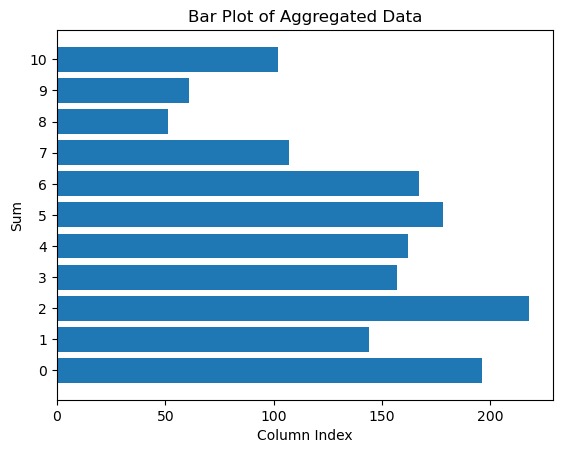

In [13]:
data_array = np.array(books)

# Aggregate the data (e.g., sum of each column)
data_aggregated = np.sum(data_array, axis=0)

# Create bar plot
x_labels = [str(i) for i in range(len(data_aggregated))]
plt.barh(x_labels, data_aggregated)

# Add labels and a title
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.title('Bar Plot of Aggregated Data')

# Show the plot
plt.show()